In [40]:
import pandas as pd
import seaborn as sns
import new_lib as nl
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
import acquire

import warnings
warnings.filterwarnings("ignore")

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

Acquire, prepare & split your data.

Univariate Stats

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

Document takeaways & any actions.

In [41]:
iris = acquire.get_iris_data(nl.get_db_url)
iris = iris.iloc[: , 1:]
iris

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...,...
145,3,146,6.7,3.0,5.2,2.3,virginica
146,3,147,6.3,2.5,5.0,1.9,virginica
147,3,148,6.5,3.0,5.2,2.0,virginica
148,3,149,6.2,3.4,5.4,2.3,virginica


In [42]:
remain, test = train_test_split(iris, test_size = .2)
train, validate = train_test_split(remain, train_size = .7)
train.shape, validate.shape, test.shape

((84, 7), (36, 7), (30, 7))

In [43]:
numerical_cols = train.select_dtypes(exclude = 'object')
object_cols = train.select_dtypes(include = 'object')

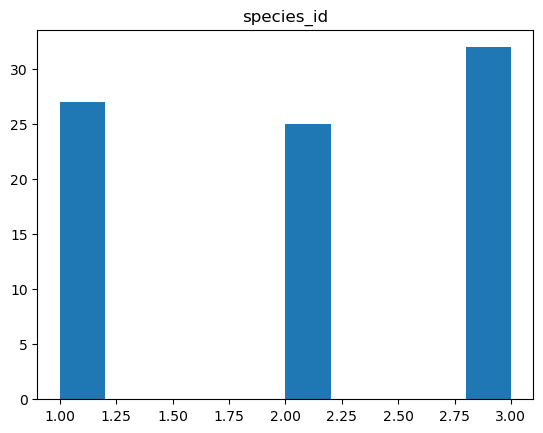

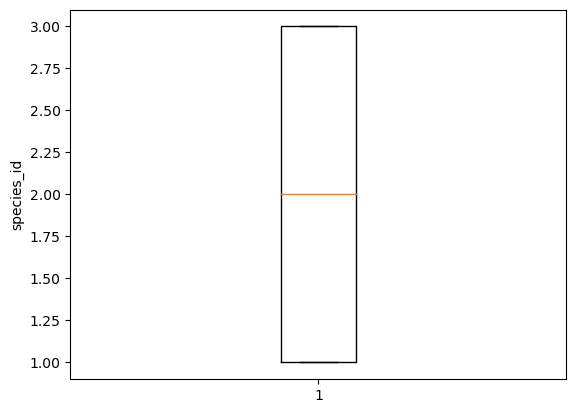

count    84.000000
mean      2.059524
std       0.840986
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       3.000000
Name: species_id, dtype: float64


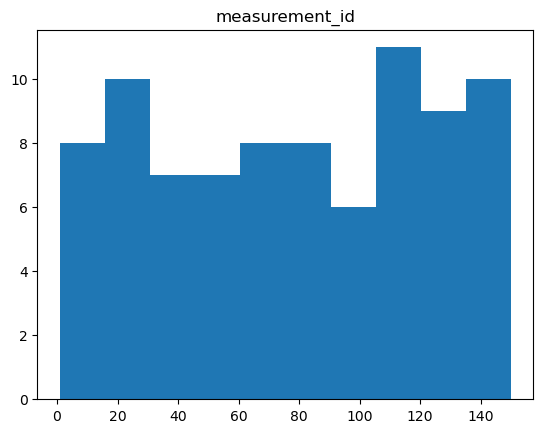

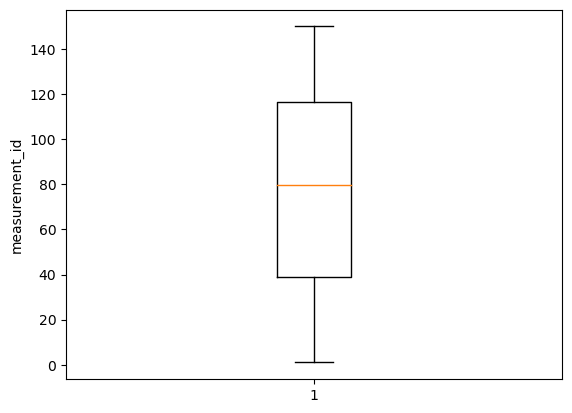

count     84.000000
mean      78.011905
std       44.731460
min        1.000000
25%       38.750000
50%       79.500000
75%      116.500000
max      150.000000
Name: measurement_id, dtype: float64


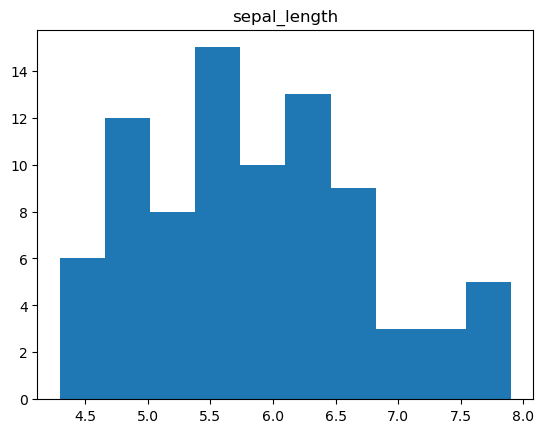

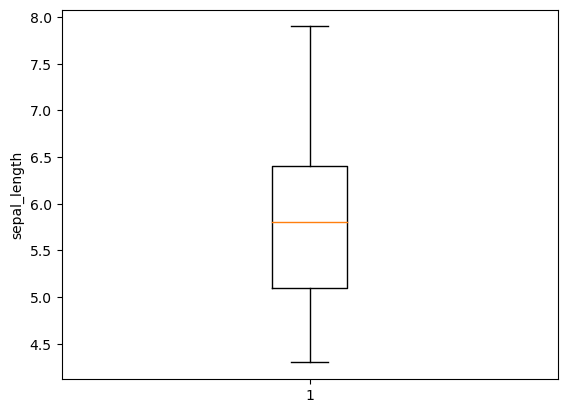

count    84.000000
mean      5.863095
std       0.866203
min       4.300000
25%       5.100000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64


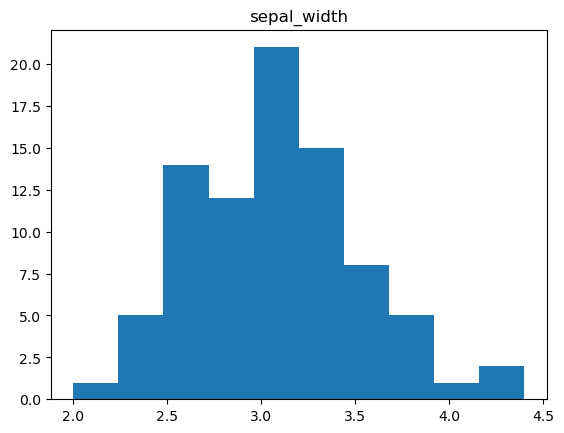

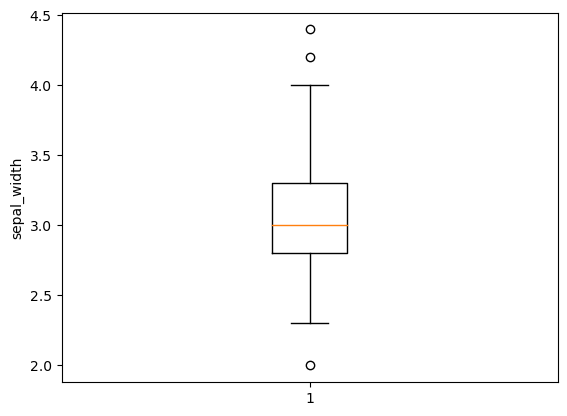

count    84.000000
mean      3.051190
std       0.450032
min       2.000000
25%       2.800000
50%       3.000000
75%       3.300000
max       4.400000
Name: sepal_width, dtype: float64


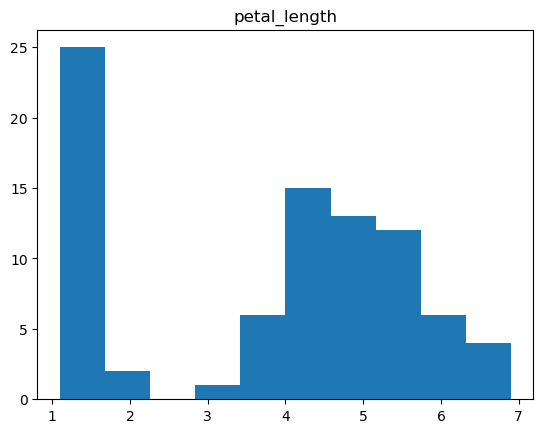

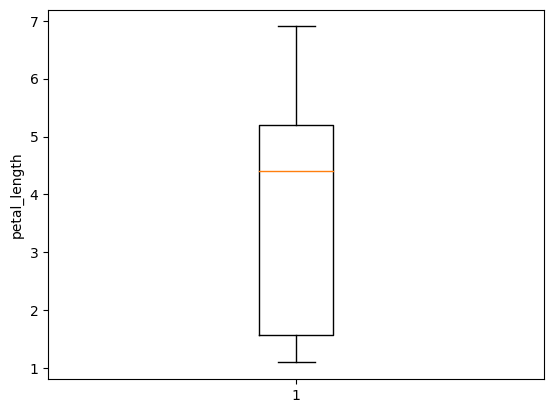

count    84.000000
mean      3.828571
std       1.801176
min       1.100000
25%       1.575000
50%       4.400000
75%       5.200000
max       6.900000
Name: petal_length, dtype: float64


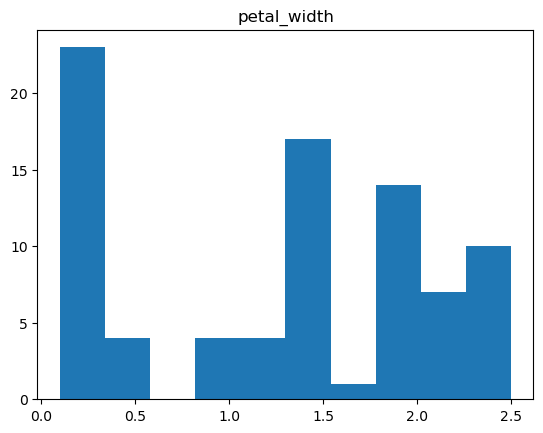

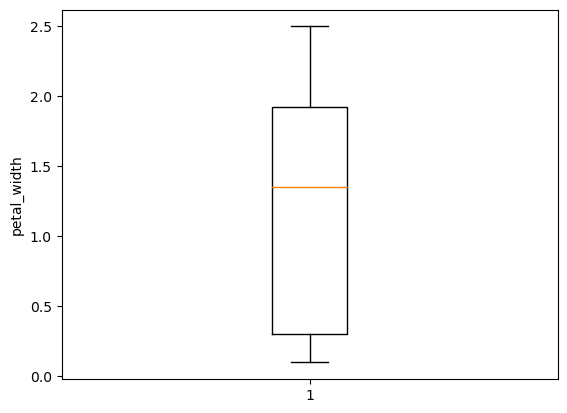

count    84.000000
mean      1.257143
std       0.797025
min       0.100000
25%       0.300000
50%       1.350000
75%       1.925000
max       2.500000
Name: petal_width, dtype: float64


In [44]:
for col in numerical_cols:
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    
    plt.boxplot(train[col])
    plt.ylabel(col)
    plt.show()
    
    print(train[col].describe())


- Sepal l and w are normally distributed however petal length and width are mostly bimodal with wide iqr

In [45]:
train.species_name.value_counts()

virginica     32
setosa        27
versicolor    25
Name: species_name, dtype: int64

(array([32.,  0.,  0.,  0.,  0., 27.,  0.,  0.,  0., 25.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

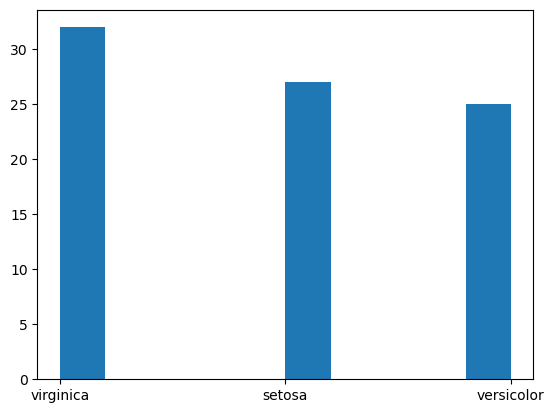

In [46]:
plt.hist(train.species_name)

Bivariate Stats

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

For each measurement type, compute the descriptive statistics for each species.

For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

Document takeaways & any actions.

Text(0.5, 1.0, 'Sepal Length Averages by Species')

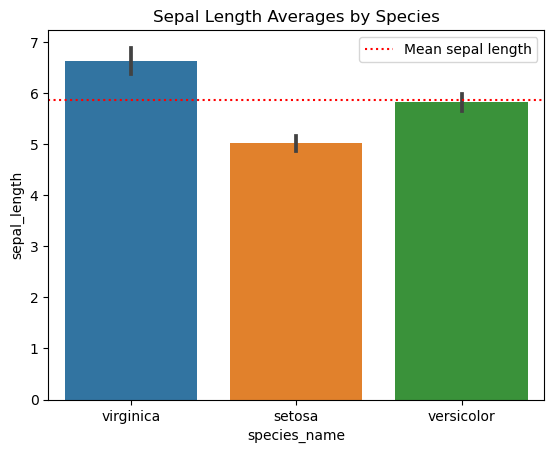

In [47]:
sns.barplot(x='species_name', y='sepal_length', data=train)
plt.axhline(train.sepal_length.mean(), label="Mean sepal length", color='red', linestyle='dotted')
plt.legend()
plt.title('Sepal Length Averages by Species')

Text(0.5, 1.0, 'Sepal Width Averages by Species')

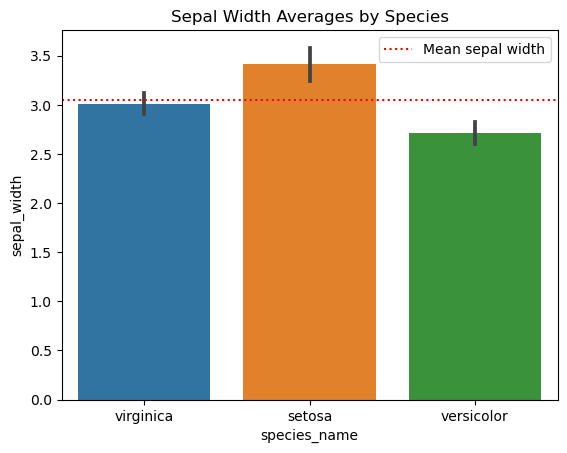

In [48]:
sns.barplot(x='species_name', y='sepal_width', data=train)
plt.axhline(train.sepal_width.mean(), label="Mean sepal width", color='red', linestyle='dotted')
plt.legend()
plt.title('Sepal Width Averages by Species')

Text(0.5, 1.0, 'Petal Length Averages by Species')

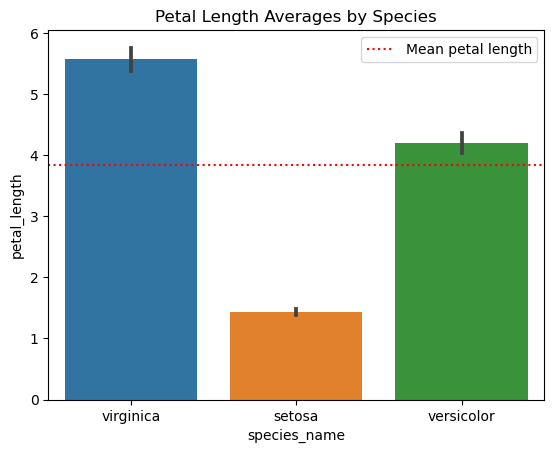

In [49]:
sns.barplot(x='species_name', y='petal_length', data=train)
plt.axhline(train.petal_length.mean(), label="Mean petal length", color='red', linestyle='dotted')
plt.legend()
plt.title('Petal Length Averages by Species')

Text(0.5, 1.0, 'Petal Width Averages by Species')

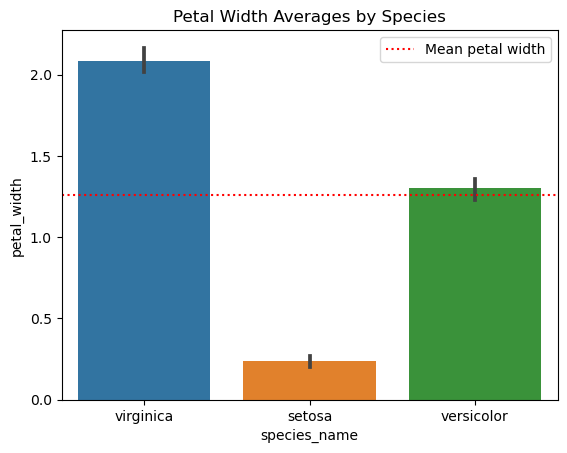

In [50]:
sns.barplot(x='species_name', y='petal_width', data=train)
plt.axhline(train.petal_width.mean(), label="Mean petal width", color='red', linestyle='dotted')
plt.legend()
plt.title('Petal Width Averages by Species')

In [51]:
train[train.species_name == 'virginica'].describe()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width
count,32.0,32.000000,32.000000,32.000000,32.000000,32.000000
mean,3.0,125.593750,6.621875,3.012500,5.562500,2.084375
std,0.0,14.341142,0.702408,0.337687,0.587367,0.234327
min,3.0,102.000000,4.900000,2.500000,4.500000,1.700000
25%,3.0,113.500000,6.175000,2.800000,5.100000,1.900000
50%,3.0,126.500000,6.600000,3.000000,5.600000,2.100000
75%,3.0,137.500000,7.125000,3.200000,5.925000,2.300000
max,3.0,150.000000,7.900000,3.800000,6.900000,2.500000


In [52]:
train[train.species_name == 'versicolor'].describe()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width
count,25.0,25.000000,25.00000,25.000,25.000000,25.000000
mean,2.0,74.680000,5.81200,2.708,4.192000,1.300000
std,0.0,14.235285,0.44471,0.290,0.413239,0.175594
min,2.0,52.000000,5.00000,2.000,3.300000,1.000000
25%,2.0,62.000000,5.60000,2.500,3.900000,1.200000
50%,2.0,75.000000,5.70000,2.800,4.200000,1.300000
75%,2.0,85.000000,6.10000,2.900,4.500000,1.500000
max,2.0,100.000000,6.60000,3.200,4.900000,1.500000


In [53]:
train[train.species_name == 'setosa'].describe()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width
count,27.0,27.000000,27.000000,27.000000,27.000000,27.000000
mean,1.0,24.703704,5.011111,3.414815,1.437037,0.237037
std,0.0,14.387000,0.399358,0.424902,0.144510,0.096668
min,1.0,1.000000,4.300000,2.300000,1.100000,0.100000
25%,1.0,14.500000,4.800000,3.150000,1.350000,0.200000
50%,1.0,26.000000,5.000000,3.400000,1.400000,0.200000
75%,1.0,37.500000,5.150000,3.600000,1.500000,0.300000
max,1.0,48.000000,5.800000,4.400000,1.700000,0.500000


In [54]:
stats.mannwhitneyu(train[train.species_name == 'virginica'].petal_width, 
                   train[train.species_name == 'versicolor'].petal_width, alternative = 'two-sided')

MannwhitneyuResult(statistic=800.0, pvalue=1.1272516675449109e-10)

In [55]:
stats.mannwhitneyu(train[train.species_name == 'virginica'].petal_length, 
                   train[train.species_name == 'versicolor'].petal_length, alternative = 'two-sided')

MannwhitneyuResult(statistic=791.0, pvalue=3.1998871176460376e-10)

In [56]:
stats.mannwhitneyu(train[train.species_name == 'virginica'].sepal_length, 
                   train[train.species_name == 'versicolor'].sepal_length, alternative = 'two-sided')

MannwhitneyuResult(statistic=677.5, pvalue=8.07833767277272e-06)

In [57]:
stats.mannwhitneyu(train[train.species_name == 'virginica'].sepal_width, 
                   train[train.species_name == 'versicolor'].sepal_width, alternative = 'two-sided')

MannwhitneyuResult(statistic=595.5, pvalue=0.0015481099257752052)

- petal length and width have the greatest variance among the species
- while setosa has very small petals it has rather large and wide sepals
- virginica has the greatest overall size

Multivariate Stats

Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

Document takeaways and any actions.

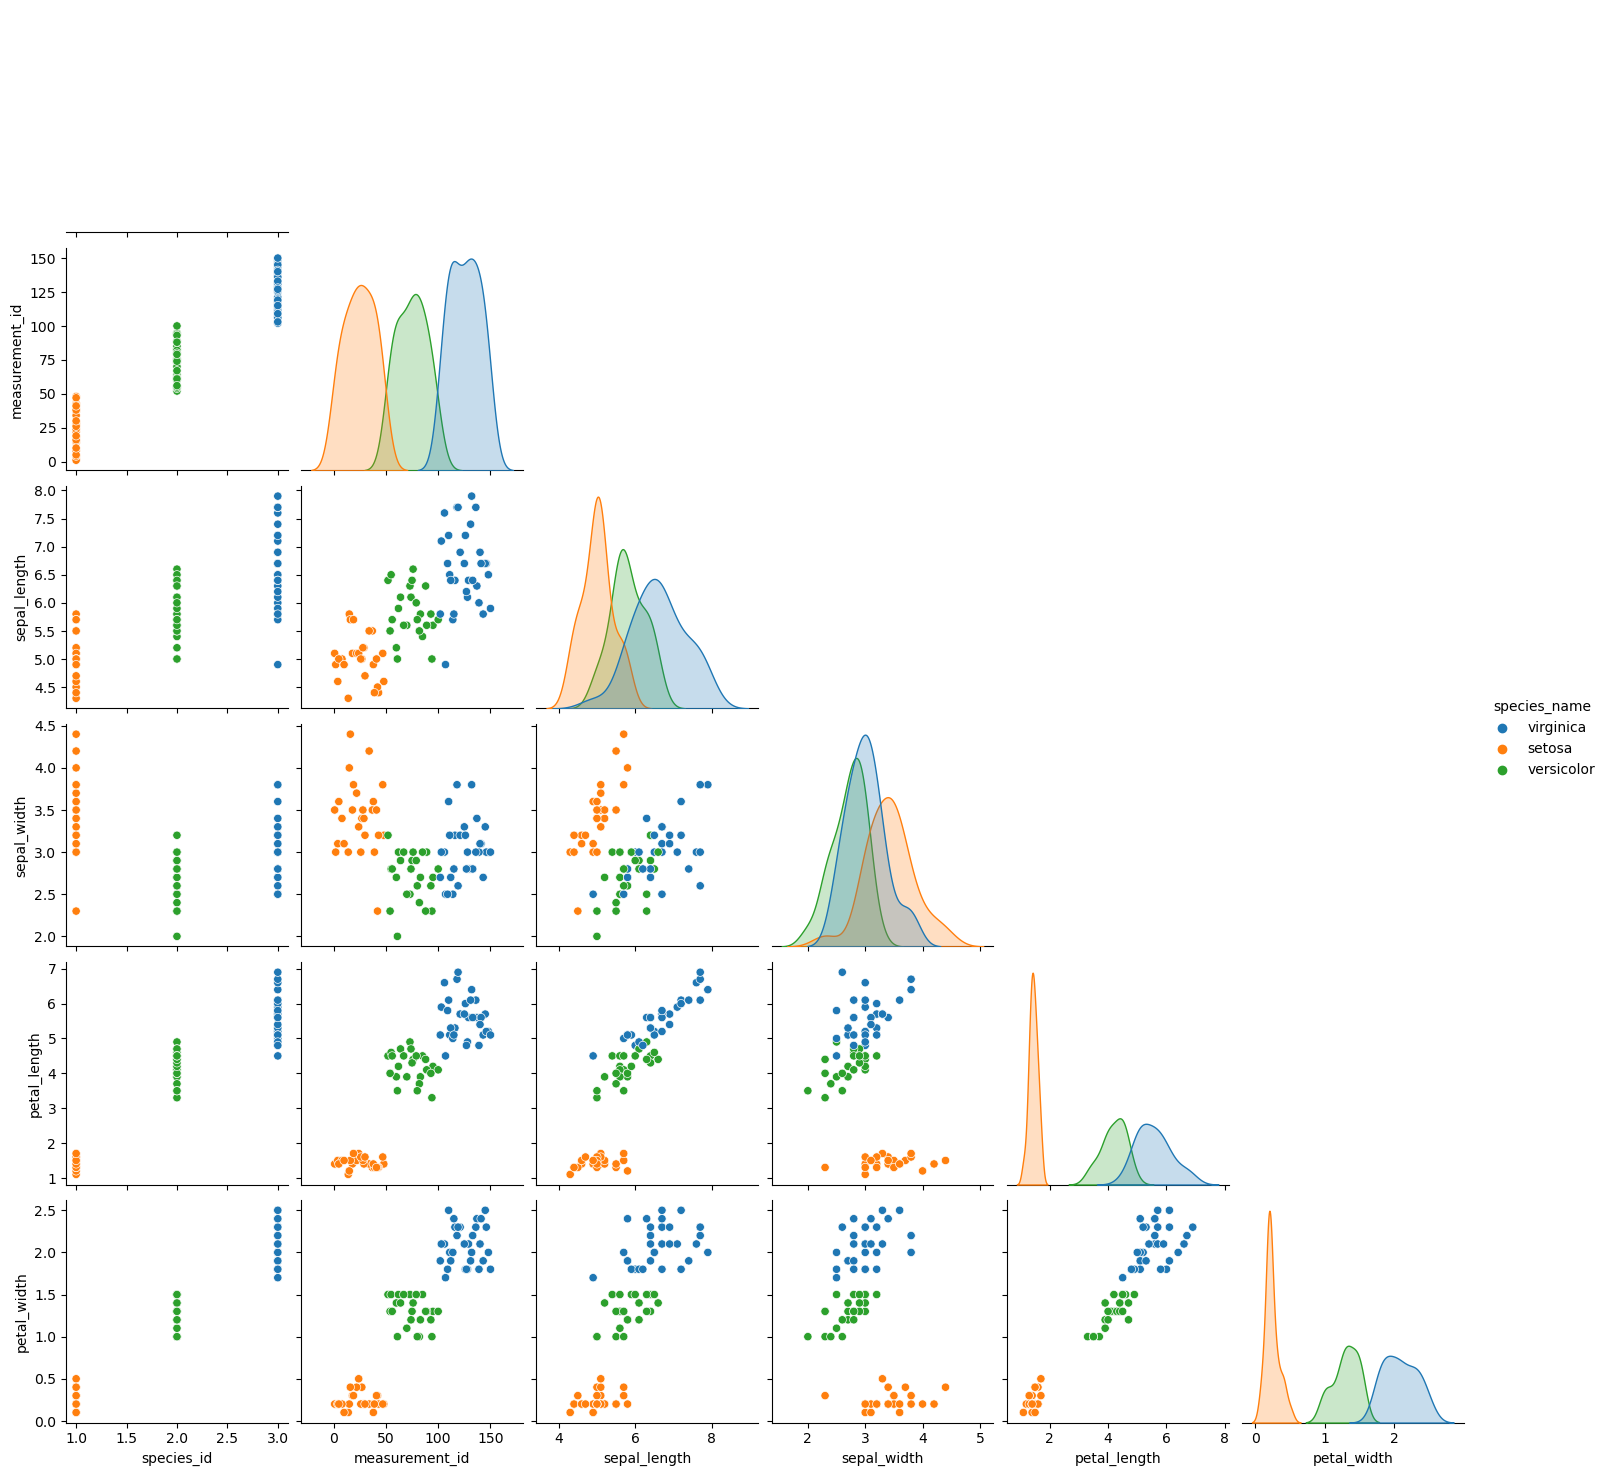

In [58]:
sns.pairplot(train, hue = 'species_name', corner = True)

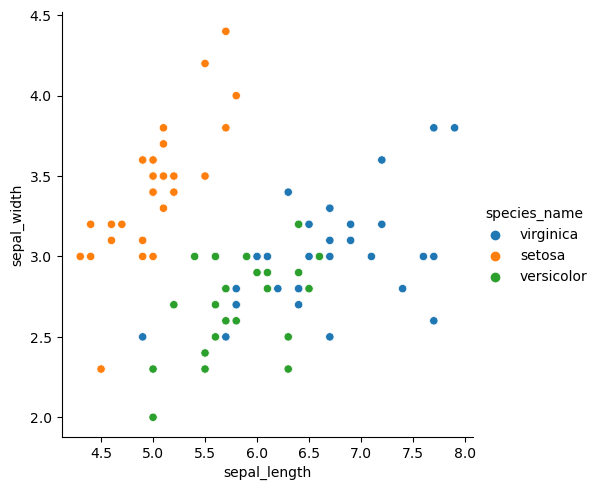

In [59]:
sns.relplot(x = 'sepal_length', y = 'sepal_width', data = train, hue= 'species_name')

In [60]:
train_melt = train.iloc[: , 2:].melt(id_vars = 'species_name')
train_melt

,species_name,variable,value
0,virginica,sepal_length,7.9
1,setosa,sepal_length,4.6
2,setosa,sepal_length,5.1
3,versicolor,sepal_length,5.6
4,virginica,sepal_length,5.8
...,...,...,...
331,versicolor,petal_width,1.3
332,versicolor,petal_width,1.3
333,virginica,petal_width,1.8
334,versicolor,petal_width,1.5


<AxesSubplot:xlabel='variable', ylabel='value'>

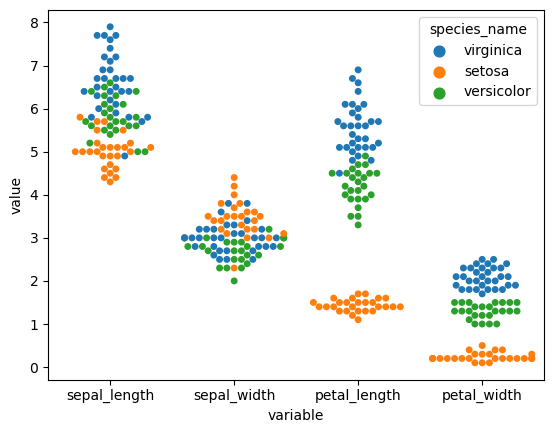

In [61]:
sns.swarmplot(x = 'variable', y = 'value', data = train_melt, hue = 'species_name')

is sepal area different between veriscolor and virginica?

In [62]:
train[train.species_name == 'virginica'].sepal_length.mean() * train[train.species_name == 'virginica'].sepal_width.mean()

19.94839843749999

In [63]:
train[train.species_name == 'versicolor'].sepal_length.mean() * train[train.species_name == 'versicolor'].sepal_width.mean()

15.738895999999997

In [64]:
train.corr()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width
species_id,1.000000,0.948629,0.782046,-0.351954,0.954916,0.970889
measurement_id,0.948629,1.000000,0.725984,-0.328967,0.893443,0.918124
sepal_length,0.782046,0.725984,1.000000,-0.000350,0.863418,0.813708
sepal_width,-0.351954,-0.328967,-0.000350,1.000000,-0.360038,-0.312912
petal_length,0.954916,0.893443,0.863418,-0.360038,1.000000,0.969111
petal_width,0.970889,0.918124,0.813708,-0.312912,0.969111,1.000000


array([[<AxesSubplot:xlabel='species_id', ylabel='species_id'>,
        <AxesSubplot:xlabel='measurement_id', ylabel='species_id'>,
        <AxesSubplot:xlabel='sepal_length', ylabel='species_id'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='species_id'>,
        <AxesSubplot:xlabel='petal_length', ylabel='species_id'>,
        <AxesSubplot:xlabel='petal_width', ylabel='species_id'>],
       [<AxesSubplot:xlabel='species_id', ylabel='measurement_id'>,
        <AxesSubplot:xlabel='measurement_id', ylabel='measurement_id'>,
        <AxesSubplot:xlabel='sepal_length', ylabel='measurement_id'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='measurement_id'>,
        <AxesSubplot:xlabel='petal_length', ylabel='measurement_id'>,
        <AxesSubplot:xlabel='petal_width', ylabel='measurement_id'>],
       [<AxesSubplot:xlabel='species_id', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='measurement_id', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='sepal_length', ylabel

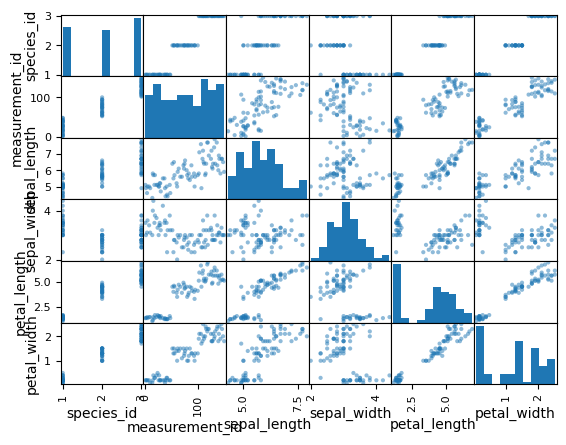

In [65]:
pd.plotting.scatter_matrix(train)

Explore your titanic dataset more completely.

Determine drivers of the target variable
Determine if certain columns should be dropped
Determine if it would be valuable to bin some numeric columns
Determine if it would be valuable to combine multiple columns into one.
Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.



In [66]:
titanic = acquire.get_titanic_data(nl.get_db_url)
titanic = titanic.iloc[: , 1:]
titanic

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [67]:
combos = ['pclass', 'sex', 'sibsp', 'parch', 'embarked', 'alone']
for var in combos:
    chi2, p, degf, expected = chi2, p, degf, expected = stats.chi2_contingency(pd.crosstab(titanic.survived, titanic[var]))
    print(f'Comparing relationship between survived and {var}')
    print(chi2, p)
    print('------------------')
    print('\n')


Comparing relationship between survived and pclass
102.88898875696056 4.549251711298793e-23
------------------


Comparing relationship between survived and sex
260.71702016732104 1.1973570627755645e-58
------------------


Comparing relationship between survived and sibsp
37.27179291520431 1.5585810465902116e-06
------------------


Comparing relationship between survived and parch
27.925784060236168 9.703526421039997e-05
------------------


Comparing relationship between survived and embarked
26.48914983923762 1.769922284120912e-06
------------------


Comparing relationship between survived and alone
36.00051446773864 1.9726543846517183e-09
------------------




In [80]:
for var in combos:
    sns.barplot(x = 'var', y= 'survived', data = 'titanic', color = 'skyblue', 
                plt.axhline(titanic.survived.mean(), color = 'rebeccapurple', linestyle = '-.'))
    plt.show()

SyntaxError: positional argument follows keyword argument (357229237.py, line 3)

In [68]:
titanic_test = titanic.dropna()
combos = ['age', 'fare']
for var in combos:
    survived = titanic_test[titanic_test.survived == 1][var]
    not_survived = titanic_test[titanic_test.survived == 0][var]
    t, p = stats.ttest_ind(survived, not_survived, equal_var = False)
    print(f'Comparing relationship between survived and {var}')
    print(t, p)
    print('------------------')
    print('\n')



Comparing relationship between survived and age
-3.402309298274847 0.0009375628268448466
------------------


Comparing relationship between survived and fare
1.944720727365632 0.053723666808373156
------------------




- The main drivers of the target variable are pclass and sex and to some extent alone
- It would be useful to drop columns that contain duplicate data such as class name and town name and also a table like fare
- We could bin age but for fare it isnt necessary since families paid a higher fare than individuals
- It isnt necessary to combine any columns
- It might be useful to find a way to combine the ttest and chi2 into 1 feature
- Suprised initially that embark location was relevant but after consideration its not that shocking

In [69]:
telco = acquire.get_telco_data(nl.get_db_url)
telco = telco.iloc[:, 1:]
telco

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.4,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.90,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Fiber optic,Month-to-month,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,2,1,9987-LUTYD,Female,0,No,No,13,Yes,...,Yes,No,No,No,55.15,742.9,No,DSL,One year,Mailed check
7039,1,1,2,9992-RRAMN,Male,0,Yes,No,22,Yes,...,No,No,Yes,Yes,85.10,1873.7,Yes,Fiber optic,Month-to-month,Electronic check
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,...,No,No,No,Yes,50.30,92.75,No,DSL,Month-to-month,Mailed check
7041,2,3,1,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,Yes,No,Yes,No,67.85,4627.65,No,DSL,Two year,Mailed check


In [70]:
combos = (['payment_type_id', 'contract_type_id', 'internet_service_type_id', 'gender', 
           'senior_citizen', 'partner', 'dependents', 'phone_service', 'multiple_lines', 
          'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
          'paperless_billing'])
for var in combos:
    chi2, p, degf, expected = chi2, p, degf, expected = stats.chi2_contingency(pd.crosstab(telco.churn, telco[var]))
    if p <= .05:
        print(f'Comparing relationship between churn and {var}')
        print(chi2, p)
        print('------------------')
        print('\n')

    



Comparing relationship between churn and payment_type_id
648.1423274814 3.6823546520097993e-140
------------------


Comparing relationship between churn and contract_type_id
1184.5965720837926 5.863038300673391e-258
------------------


Comparing relationship between churn and internet_service_type_id
732.309589667794 9.571788222840544e-160
------------------


Comparing relationship between churn and senior_citizen
159.42630036838742 1.510066805092378e-36
------------------


Comparing relationship between churn and partner
158.7333820309922 2.1399113440759935e-36
------------------


Comparing relationship between churn and dependents
189.12924940423474 4.9249216612154196e-43
------------------


Comparing relationship between churn and multiple_lines
11.33044148319756 0.0034643829548773
------------------


Comparing relationship between churn and online_security
849.9989679615962 2.6611496351768565e-185
------------------


Comparing relationship between churn and online_backup
60

In [71]:
telco_test = telco.dropna()
telco_test.total_charges = telco_test.total_charges.replace(' ', 0).astype(float)

In [72]:
combos = ['monthly_charges', 'total_charges']
for var in combos:
    churn = telco_test[telco_test.churn == 'Yes'][var]
    not_churned = telco_test[telco_test.churn == 'No'][var]
    t, p = stats.ttest_ind(churn, not_churned, equal_var = False)
    print(f'Comparing relationship between churn and {var}')
    print(t, p)
    print('------------------')
    print('\n')

Comparing relationship between churn and monthly_charges
18.407526676414673 8.59244933154705e-73
------------------


Comparing relationship between churn and total_charges
-18.70661828817703 5.902580609073978e-75
------------------




In [73]:
telco_test.total_charges.isna().sum()

0

In [74]:
telco_test[telco_test.churn == 'No'].total_charges

0        593.30
1        542.40
5        571.45
6       7904.25
7       5377.80
         ...   
7035     633.45
7038     742.90
7040      92.75
7041    4627.65
7042    3707.60
Name: total_charges, Length: 5174, dtype: float64

- All columns that have a significantly low p are the drivers, mainly contract type, online security, and tech support
- Any column that was not significant should be dropped
- Not necessary to bin columns 
- Suprised that online_security is that important and how relativley unimportant charges are

In [75]:
titan = titanic[titanic.survived == 1].groupby(['sex','pclass']).count().reset_index()
titan

,sex,pclass,passenger_id,survived,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,female,1,91,91,82,91,91,91,89,91,78,89,91
1,female,2,70,70,68,70,70,70,70,70,9,70,70
2,female,3,72,72,47,72,72,72,72,72,4,72,72
3,male,1,45,45,40,45,45,45,45,45,39,45,45
4,male,2,17,17,15,17,17,17,17,17,4,17,17
5,male,3,47,47,38,47,47,47,47,47,2,47,47


<AxesSubplot:xlabel='pclass', ylabel='survived'>

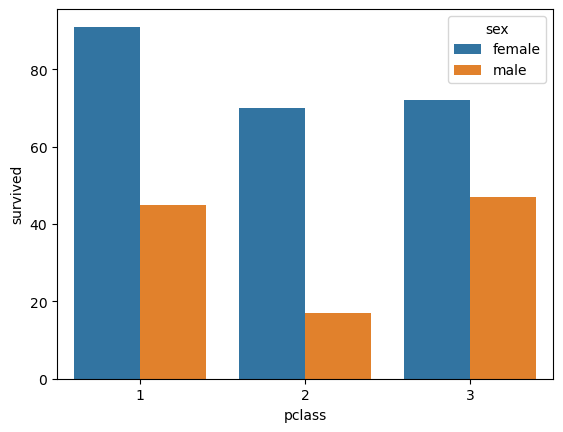

In [76]:
sns.barplot(x = 'pclass', y= 'survived', data = titan, hue='sex')

TypeError: train_vailidate_test_split() missing 2 required positional arguments: 'df' and 'target'